# ¿Cómo viajan los turistas en España?

In [382]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import plotly.graph_objects as go

# Hipotesis: 


 ¿El turismo en España sigue una fuerte estacionalidad, con picos en verano y descensos en invierno? Datos

 ¿El turismo en España es mas de Turismo o Excursion? DATOS 2016 A 2025

 ¿España es un pais en el que el viaje por negocios va en aumento? 

 ¿Los turistas de ciertos países gastan más dinero en España que otros? Desde 2015 a 2025


# ¿El turismo en España sigue una fuerte estacionalidad, con picos en verano y descensos en invierno?

La primera pregunta que analizamos es si el turismo en España sigue una fuerte estacionalidad. Para ello, observamos el número de turistas en cada estación del año.

In [383]:
turismo = pd.read_excel("./data/tourism_dataset.xlsx") #Importa Dataset de la carpeta src
turismo=pd.DataFrame(turismo) #Convierte a formato Dataframe

#Creo un dataframe aparte para limpiar el nombre de las columnas
reemplazo_comunidad=turismo[" "].str.split(expand=True)
reemplazo_comunidad= reemplazo_comunidad.drop(columns = [0, 2, 3, 4])
#reemplazo_comunidad

#Union entre el datafram principal y el datafram de nombres limpios
turismo= pd.concat([turismo, reemplazo_comunidad], axis=1)
turismo = turismo.rename(columns={1: 'Comunidad'}) #Renombra la columna recien concatenada
turismo= turismo.drop(columns = [" "]) #Elimina la columna original 

#Numeros y caracteres innecesarios en las fechas
turismo.columns=turismo.columns.str.replace("M", " ")
turismo.columns=turismo.columns.str.replace(".5", "")
turismo.columns=turismo.columns.str.replace(".4", "")
turismo.columns=turismo.columns.str.replace(".3", "")
turismo.columns=turismo.columns.str.replace(".2", "")
turismo.columns=turismo.columns.str.replace(".1", "")

turismo = turismo.set_index("Comunidad") #Nuevo indice seranlos nombres de las comunidades
turismo = turismo.transpose() #Se revierte el orden para poner las fechas como indices

#Convertir los valores a STR para poder reemplazar simbolos y luego convertir a formato numerico
turismo = turismo.astype(str)
turismo = turismo.replace('\\.', '', regex=True)
turismo = turismo.replace(',', '.', regex=True)  # Cambia comas por puntos
turismo = turismo.apply(pd.to_numeric, errors='coerce')

turismo = turismo.loc[:, ~turismo.columns.duplicated()]#Elimina columnas duplicadas
turismo = turismo[~turismo.index.duplicated(keep='first')]

nuevo_índice = pd.to_datetime(turismo.index, format='%Y %m').to_period('M') #Convierto a formato fecha quedandome solo con mes y año.
turismo.index = nuevo_índice #Actualizo el indice en el Dataframe principal
turismo = turismo.sort_index()  # Ordena en ascendente

def estacion(df = turismo, año = 2024, comunidades=("Madrid",), temporadas=("invierno",)): #Funcion para filtrar el Dataframe
    '''
    Filtra el DataFrame principal con:
    - Rango de años.
    - Ciudades Seleccionadas en España.
    - Temporadas Seleccionadas.

    P/ejem: 
    estacion(turismo, (2020, 2024), ["Madrid", "Barcelona"], ("invierno", "primavera"))
    '''
    
    temporada_dict={ 
        "primavera":(3,4,5),
        "verano" : (6,7,8),
        "otoño" : (9,10,11),
        "invierno" : (12, 1, 2)}
    
    meses = sum((temporada_dict[temporada] for temporada in temporadas), ())
    
    if isinstance(comunidades, str):
        comunidades = [comunidades]
        # df = df.to_timestamp()
    filtro = (
        (df.index.strftime('%Y').astype(int) >= año[0]) &
        (df.index.strftime('%Y').astype(int) <= año[1]) &
        (df.index.strftime('%m').astype(int).isin(meses))
    )
    
    # Devuelve el DataFrame filtrado para las comunidades seleccionadas
    return df.loc[filtro, comunidades]


total_nacional = ('Nacional') #Condensa el total por año de toda españa 

#Media y mediana nacional por año desde 1990 hasta 2024
media_nacional = turismo['Nacional'].groupby(turismo.index.year).mean()
mediana_nacional = turismo['Nacional'].groupby(turismo.index.year).median()

#Datos COVID
# Analisis de turismo, pre, durante y post covid
pre_covid = estacion(turismo, año=(2017, 2019), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo pre covid en España
covid = estacion(turismo, año=(2020, 2021), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo durante el covid en España
post_covid = estacion(turismo, año=(2022, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo post covid en España
covid_general = estacion(turismo, año=(2019, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo post covid en España

#Muestras Verano
verano_nacional = estacion(turismo, año=(1999, 2023), comunidades=total_nacional, temporadas=("verano",)) #España completa

#Muestras Invierno
invierno_nacional = estacion(turismo, año=(1999, 2023), comunidades=total_nacional, temporadas=("invierno",)) #España completa

año1999=estacion(turismo, año=(1999, 1999), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #España completa
año2024=estacion(turismo, año=(2024, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #España completa
turismo_españa=estacion(turismo, año=(1999, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #España completa


In [384]:
turismo_españa.index = turismo_españa.index.to_timestamp()  # Convierte PeriodIndex a DatetimeIndex
df_grouped = turismo_españa.groupby(turismo_españa.index.year).sum()


Crecimiento turismo en españa por año desde 1999 hasta 2025

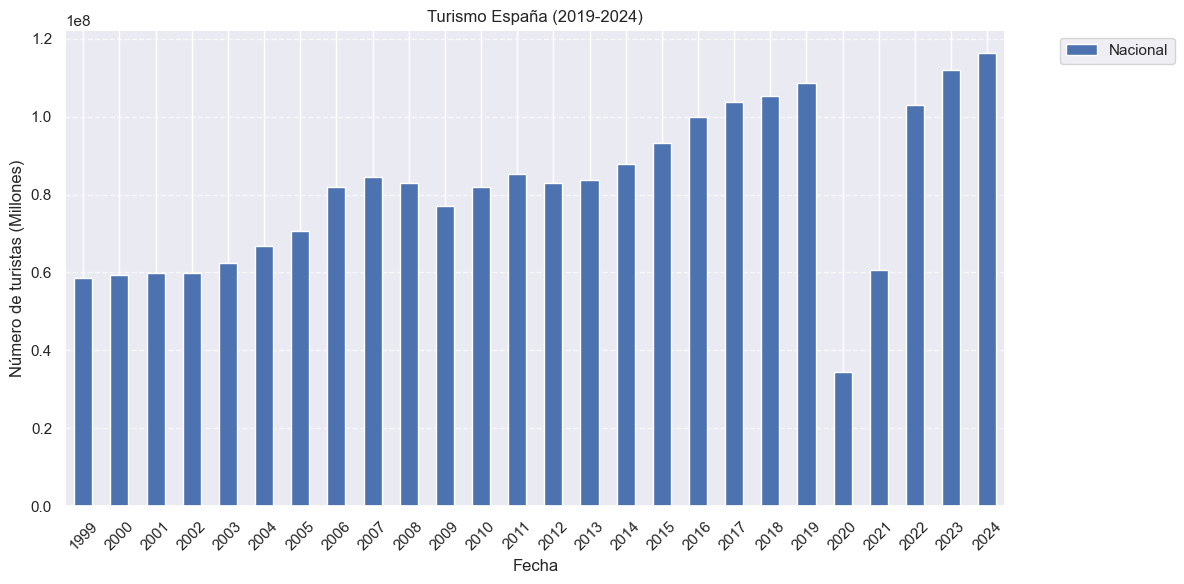

In [385]:
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), title="Turismo España (2019-2024)")
plt.xlabel("Fecha")
plt.ylabel("Número de turistas (Millones)")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de guía en el eje Y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.tight_layout()  # Ajustar automáticamente la disposición del gráfico
plt.show()

In [386]:
verano_nacional.index = verano_nacional.index.to_timestamp()
invierno_nacional.index = invierno_nacional.index.to_timestamp()

Comparacion numero de turistas en verano vs invierno España 1999 hasta 2025

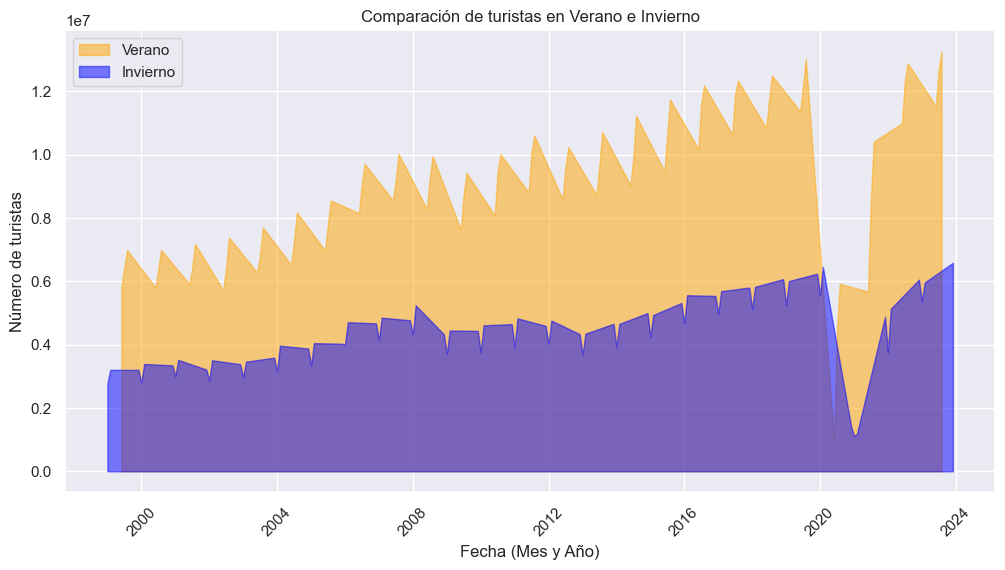

In [387]:
plt.figure(figsize=(12, 6))

# Graficar con área rellena para verano
plt.fill_between(verano_nacional.index, verano_nacional["Nacional"], color="orange", alpha=0.5, label="Verano")

# Graficar con área rellena para invierno
plt.fill_between(invierno_nacional.index, invierno_nacional["Nacional"], color="blue", alpha=0.5, label="Invierno")

# Personalizar la gráfica
plt.xlabel("Fecha (Mes y Año)")
plt.ylabel("Número de turistas")
plt.title("Comparación de turistas en Verano e Invierno")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# ¿El turismo en España es mas de Turismo o Excursion? DATOS 2016 A 2025

In [388]:
tipologia = pd.read_excel("./data/tipologia_viaje.xlsx") #Importa el archivo

In [389]:
tipologia

,,2025M01,2024M12,2024M11,2024M10,2024M09,2024M08,2024M07,2024M06,2024M05,...,2016M07,2016M06,2016M05,2016M04,2016M03,2016M02,2016M01,2015M12,2015M11,2015M10
0,Dato base,8147788.0,8779950.0,9053630.0,12919686.0,13310160.0,16621567.0,15957871.0,12483868.0,13088646.0,...,14103246.0,10882964.0,10409297.0,9254452.0,7684502.0,6254862.0,6133318.0,6417639,6429628,9940966
1,Tasa de variación anual,12.5,2.7,12.3,9.7,6.4,7.3,8.0,8.8,12.0,...,7.0,7.5,4.3,5.6,10.6,6.7,4.0,3.8,4.4,5.2
2,Acumulado en lo que va de año,8147788.0,137640110.0,128860160.0,119806530.0,106886844.0,93576684.0,76955117.0,60997245.0,48513377.0,...,64722641.0,50619395.0,39736431.0,29327134.0,20072683.0,12388180.0,6133318.0,,,
3,Tasa de variación acumulada,12.5,9.4,9.9,9.8,9.8,10.3,10.9,11.7,12.5,...,6.5,6.4,6.1,6.8,7.3,5.3,4.0,,,
4,Turista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dato base,5065094.0,5264375.0,5670219.0,8961932.0,9602015.0,10929584.0,10852347.0,9299574.0,9255985.0,...,9545792.0,7552758.0,7111154.0,6086327.0,4627206.0,3678726.0,3526537.0,3512914,3754802,6432341
6,Tasa de variación anual,6.1,1.1,10.4,9.5,9.2,7.3,7.3,11.9,11.5,...,10.0,12.9,8.2,11.6,15.4,13.9,11.0,7.9,10.6,8.9
7,Acumulado en lo que va de año,5065094.0,93759297.0,88494922.0,82824703.0,73862771.0,64260756.0,53331172.0,42478825.0,33179251.0,...,42128500.0,32582708.0,25029951.0,17918796.0,11832469.0,7205263.0,3526537.0,,,
8,Tasa de variación acumulada,6.1,10.1,10.7,10.7,10.8,11.1,11.9,13.2,13.5,...,11.4,11.8,11.5,12.9,13.6,12.5,11.0,,,
9,Excursionista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
tipologia = pd.read_excel("./data/tipologia_viaje.xlsx") #Importa el archivo
tipologia.columns=tipologia.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
pd.options.display.float_format = '{:.1f}'.format #sE modifican los valores que tenian anotacion cientifica y confirma el formato float.
tipologia=tipologia.set_index(" ")
tipologia = tipologia[tipologia.columns[::-1]]
tipologia=tipologia.drop(["2015 10", "2015 11", "2015 12"], axis=1)
tipologia=tipologia.transpose()
tipologia = tipologia.apply(pd.to_numeric, errors='coerce')

nuevo_índice_tipologia = pd.to_datetime(tipologia.index, format='%Y %m').to_period('M') #Convierto a formato fecha quedandome solo con mes y año.
tipologia.index = nuevo_índice_tipologia #Actualizo el indice en el Dataframe principal
tipologia = tipologia.sort_index()  # Ordena en ascendente
tipologia.columns = tipologia.columns.str.strip()

tipologia_2=tipologia.drop(["Acumulado en lo que va de año", "Tasa de variación anual", "Tasa de variación acumulada"], axis=1)
tipologia_2 = tipologia_2.iloc[:, 1:]
tipologia_2.columns.values[1] = "Datos Turista"  # Cambia la segunda columna
tipologia_2.columns.values[3] = "Datos Excursionista"
tipologia_2=tipologia_2.drop(["Turista", "Excursionista"], axis=1)






In [391]:
tipologia_2

,Datos Turista,Datos Excursionista
2016-01,3526537.0,2606782.0
2016-02,3678726.0,2576136.0
2016-03,4627206.0,3057296.0
2016-04,6086327.0,3168124.0
2016-05,7111154.0,3298143.0
...,...,...
2024-09,9602015.0,3708145.0
2024-10,8961932.0,3957754.0
2024-11,5670219.0,3383411.0
2024-12,5264375.0,3515575.0


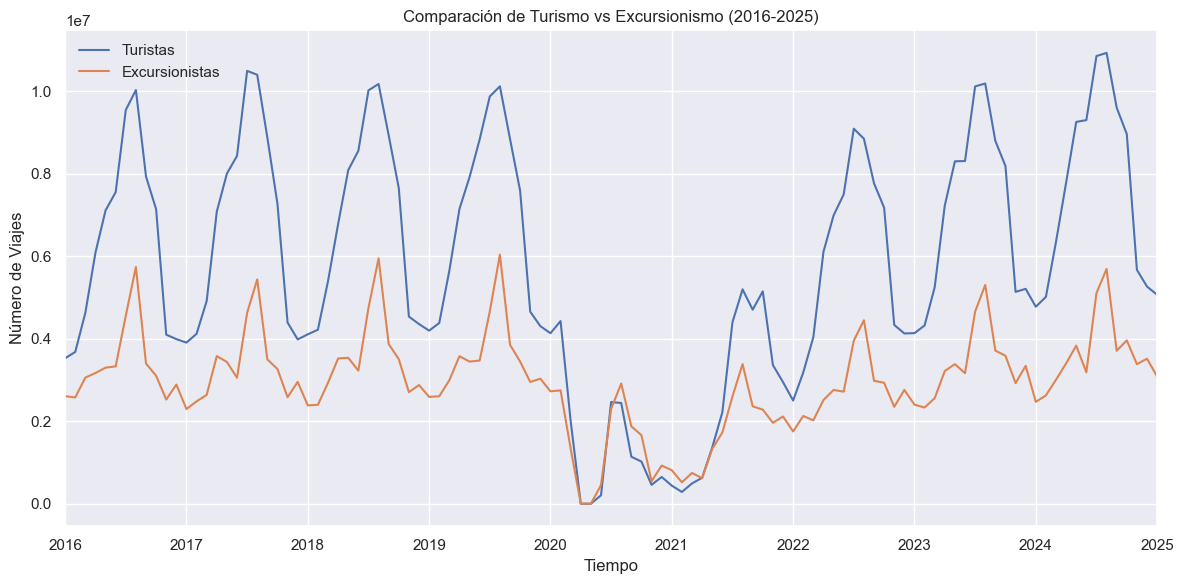

In [392]:
tipologia_2.plot(figsize=(12, 6))
plt.title("Comparación de Turismo vs Excursionismo (2016-2025)")
plt.xlabel("Tiempo")
plt.ylabel("Número de Viajes")
plt.legend(["Turistas", "Excursionistas"], frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

In [393]:
total_turistas = tipologia_2["Datos Turista"].sum()
total_excursionistas = tipologia_2["Datos Excursionista"].sum()

print(f"Total de turistas (2016-2025): {total_turistas:,.0f}")
print(f"Total de excursionistas (2016-2025): {total_excursionistas:,.0f}")


Total de turistas (2016-2025): 629,267,722
Total de excursionistas (2016-2025): 323,184,160


In [394]:
# Convertir el índice de tipo Period a cadenas (strings)
tipologia_2.index = tipologia_2.index.astype(str)

# Crear la figura en Plotly
import plotly.graph_objects as go

fig = go.Figure()

# Agregar líneas con sombreado
fig.add_trace(go.Scatter(
    x=tipologia_2.index,
    y=tipologia_2["Datos Turista"],
    mode="lines",
    name="Turistas",
    fill="tozeroy",  # Sombreado hasta el eje X
    line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=tipologia_2.index,
    y=tipologia_2["Datos Excursionista"],
    mode="lines",
    name="Excursionistas",
    fill="tozeroy",
    line=dict(color="green")
))

# Título y diseño
fig.update_layout(
    title="Comparación de Turismo vs Excursionismo (2016-2025)",
    xaxis_title="Tiempo",
    yaxis_title="Número de Viajes",
    template="simple_white"
)

fig.show()


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# ¿España es un pais en el que el viaje por negocios va en aumento?

In [395]:
motivo_viaje = pd.read_excel("./data/motivo_viaje.xlsx")
motivo_viaje.columns=motivo_viaje.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
motivo_viaje = motivo_viaje.transpose()
motivo_viaje.columns = motivo_viaje.iloc[0].astype(str).str.strip()  #Convierte valores string y elimina los espacios
motivo_viaje = motivo_viaje.drop(motivo_viaje.index[0])  #Elimina la fila con los nombres
#motivo_viaje.columns
#motivo_viaje

motivo_viaje.columns.values[5] = "Total Ocio"
motivo_viaje.columns.values[10] = "Total Negocios"
motivo_viaje.columns.values[15] = "Total Otros motivos"

negocios = motivo_viaje[['Total Negocios']].copy()
# negocios = negocios.transpose()
negocios = negocios[negocios.columns[::-1]]
negocios

,Total Negocios
2025 01,244325.0
2024 12,287335.0
2024 11,463667.0
2024 10,525253.0
2024 09,567884.0
...,...
2016 02,441059.0
2016 01,347876.0
2015 12,301888
2015 11,393014


In [396]:
maximo = negocios.max()
print(maximo.idxmax(), maximo.max())

minimo=negocios.min()
print(minimo.idxmin(), minimo.min())

Total Negocios 606756.0
Total Negocios 0.0


In [397]:
negocios

,Total Negocios
2025 01,244325.0
2024 12,287335.0
2024 11,463667.0
2024 10,525253.0
2024 09,567884.0
...,...
2016 02,441059.0
2016 01,347876.0
2015 12,301888
2015 11,393014


In [417]:
negocios.index = pd.to_datetime(negocios.index, errors='coerce') 
negocios = negocios.groupby(negocios.index.year).sum()
negocios[]

,Total Negocios
1970,39049019.0


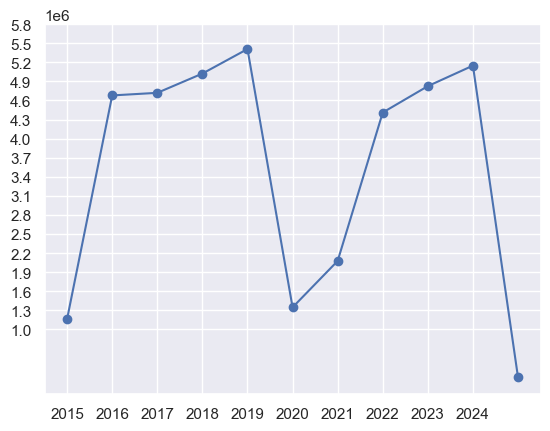

In [415]:
 plt.plot(negocios.index, negocios["Total Negocios"], data=df, linestyle='-', marker='o')
plt.xticks(np.arange(2015,2025,1))
plt.yticks(np.arange(1000000,6000000,300000))
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# ¿Los turistas de ciertos países gastan más dinero en España que otros? Desde 2015 a 2025

In [400]:
pais = pd.read_excel("./data/Gasto_segun_paisxlsx.xlsx")
pais.columns=pais.columns.str.replace("M", "-")#Reemplaza la M de las fechas por un espacio
pais=pais.set_index(" ")
pais = pais.transpose()
pais = pais.apply(pd.to_numeric, errors='coerce')

pais_2 = pd.read_excel("./data/gasto_por_pais.xlsx")
pais_2.columns = pais_2.columns.str.replace("M", "-") #reemplazar "M" por espacio
pais_2 = pais_2.transpose() #Transponer el DataFrame
pais_2.columns = pais_2.iloc[0]
pais_2 = pais_2[1:]

pais_2.index = pd.to_datetime(pais_2.index, errors='coerce') 
df_anual = pais_2.groupby(pais_2.index.year).sum()
df_anual[-2:-1]


,Total,Reino Unido,Países Nórdicos,Resto del Mundo,Alemania,Francia,Italia
2024,126143.2,22551.7,7860.5,64156.9,15515.4,10969.2,5089.6


En 2024, el turismo en España alcanzó cifras récord, generando un total de 207.763 millones de euros en actividad económica. Este sector representó el 13,1% del PIB nacional, consolidándose como el principal motor económico del país. Además, el gasto acumulado de los turistas internacionales fue de 126.282 millones de euros, lo que supone un incremento del 16,1% respecto al año anterior.

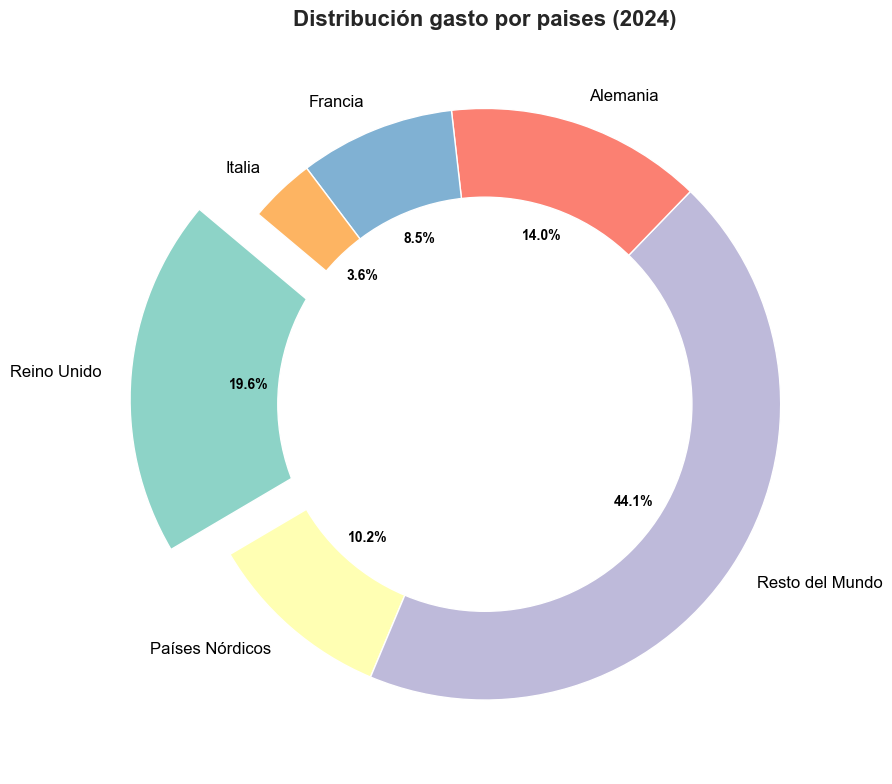

In [427]:
valores = df_anual.iloc[0, 1:]  # Valores de la primera fila sin total nacional
etiquetas = df_anual.columns[1:]  # Nombres de las columnas sin el total nacional
plt.figure(figsize=(10, 8)) #Grafico pastel
wedges, texts, autotexts = plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',  # Muestra porcentajes
    startangle=140,     # angulo inicial
    colors=plt.cm.Set3.colors,  # Colores
    explode = (0.2,0,0,0,0,0),
    textprops=dict(color="black")  # Estilo del texto
)
plt.setp(autotexts, size=10, weight="bold")  #porcentajes más visibles
plt.setp(texts, size=12)  # agranda las etiquetas
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Crear el círculo blanco para generar el "semi-donut"
plt.gca().add_artist(centre_circle)  # Añadirlo al gráfico
plt.title("Distribución gasto por paises (2024)", fontsize=16, weight="bold")# Título del gráfico
plt.tight_layout() #Espacios
plt.show()


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++